<a href="https://colab.research.google.com/github/ananyataneja/Skin-Cancer-Image-Classification/blob/main/SKIC_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Libraries

In [ ]:
import os , glob

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import keras
from tensorflow.keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D
from keras.models import Model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
from tensorflow.keras.optimizers import Adam

In [ ]:
pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=fe4aed22d6964ff6fe2ef5c85d94ae4704d71b541e9bccdf1b816760e8b5b042
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [ ]:
! pip install -q kaggle

#Uploading Dataset

In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
! kaggle datasets download kmader/skin-cancer-mnist-ham10000

Dataset URL: https://www.kaggle.com/datasets/kmader/skin-cancer-mnist-ham10000
License(s): CC-BY-NC-SA-4.0
100% 5.20G/5.20G [02:59<00:00, 20.7MB/s]
100% 5.20G/5.20G [02:59<00:00, 31.1MB/s]


In [ ]:
!unzip  skin-cancer-mnist-ham10000.zip

Streaming output truncated to the last 5000 lines.
  inflating: ham10000_images_part_2/ISIC_0029325.jpg  
  inflating: ham10000_images_part_2/ISIC_0029326.jpg  
  inflating: ham10000_images_part_2/ISIC_0029327.jpg  
  inflating: ham10000_images_part_2/ISIC_0029328.jpg  
  inflating: ham10000_images_part_2/ISIC_0029329.jpg  
  inflating: ham10000_images_part_2/ISIC_0029330.jpg  
  inflating: ham10000_images_part_2/ISIC_0029331.jpg  
  inflating: ham10000_images_part_2/ISIC_0029332.jpg  
  inflating: ham10000_images_part_2/ISIC_0029333.jpg  
  inflating: ham10000_images_part_2/ISIC_0029334.jpg  
  inflating: ham10000_images_part_2/ISIC_0029335.jpg  
  inflating: ham10000_images_part_2/ISIC_0029336.jpg  
  inflating: ham10000_images_part_2/ISIC_0029337.jpg  
  inflating: ham10000_images_part_2/ISIC_0029338.jpg  
  inflating: ham10000_images_part_2/ISIC_0029339.jpg  
  inflating: ham10000_images_part_2/ISIC_0029340.jpg  
  inflating: ham10000_images_part_2/ISIC_0029341.jpg  
  inflating: h

#Exploratory Data Analysis

In [ ]:
csv_path = '/content/HAM10000_metadata.csv'
data = pd.read_csv(csv_path)

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.fillna(method='ffill', inplace=True)

<ipython-input-112-519281724d28>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data.fillna(method='ffill', inplace=True)


In [ ]:
print(data.isnull().sum())

lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64


In [ ]:
data["image_full_name"]=data["image_id"]+ ".jpg"

In [ ]:
data.head()

,lesion_id,image_id,dx,dx_type,age,sex,localization,image_full_name
0,HAM_0000118,ISIC_0027419,bkl,histo,80.0,male,scalp,ISIC_0027419.jpg
1,HAM_0000118,ISIC_0025030,bkl,histo,80.0,male,scalp,ISIC_0025030.jpg
2,HAM_0002730,ISIC_0026769,bkl,histo,80.0,male,scalp,ISIC_0026769.jpg
3,HAM_0002730,ISIC_0025661,bkl,histo,80.0,male,scalp,ISIC_0025661.jpg
4,HAM_0001466,ISIC_0031633,bkl,histo,75.0,male,ear,ISIC_0031633.jpg


In [ ]:
data=np.array(data)

In [ ]:
dictionary = {}
for row in data:
    key = row[7]
    value = row[2]
    dictionary[key] = value

In [ ]:
import os
import shutil

#Combining all Directories

In [ ]:
def copy_images(source_folder, destination_folder):
    for filename in os.listdir(source_folder):
        source_path = os.path.join(source_folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        shutil.copy(source_path, destination_path)

In [ ]:
folder1_path = '/content/HAM10000_images_part_1'
folder2_path = '/content/HAM10000_images_part_2'

In [ ]:
combined_folder_path = 'all_images/'
if not os.path.exists(combined_folder_path):
    os.makedirs(combined_folder_path)

In [ ]:
copy_images(folder1_path, combined_folder_path)

In [ ]:
copy_images(folder2_path, combined_folder_path)

In [ ]:
from tensorflow.keras import utils
import numpy as np
import matplotlib.pyplot as plt

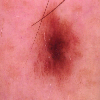

In [ ]:
img = utils.load_img("all_images/ISIC_0024306.jpg", target_size=(100,100))
img

In [ ]:
img = np.array(img)
img.shape

(100, 100, 3)

#Train-Test Split

In [ ]:
X= []
Y= []

In [ ]:
folder = "all_images"

In [ ]:
for img_name in os.listdir(folder):
        img_path = folder +"/"+img_name
        img = utils.load_img(img_path, target_size=(100,100))
        img = np.array(img)
        X.append(img)
        label=dictionary[img_name]
        Y.append(label)

In [ ]:
x = np.array(X)
y= np.array(Y)

In [ ]:
x.shape

(10015, 100, 100, 3)

In [ ]:
y.shape

(10015,)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

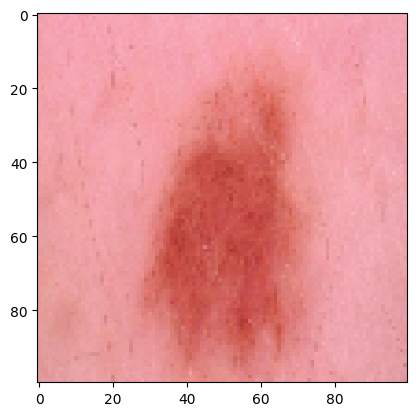

In [ ]:
plt.imshow(x_train[20])

#Label Encoding

In [ ]:
np.unique(y_train)

array(['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc'], dtype='<U5')

In [ ]:
category2label = {"akiec" : 0, "bcc" : 1, "bkl" : 2, "df":3 , "mel" : 4, "nv" : 5, "vasc" : 6}

In [ ]:
 label2category = {0: "Actinic keratoses", 1: "Basal cell carcinoma", 2: "Benign keratosis-like lesions",
                   3: "Dermatofibroma", 4:"Melanoma" , 5:"Melanocytic nevi:", 6:"Vascular lesions"}

In [ ]:
y_train = np.array([category2label[label] for label in y_train])

In [ ]:
y_test = np.array([category2label[label] for label in y_test])

In [ ]:
y_train[:5]

array([5, 5, 2, 2, 5])

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train_new = to_categorical(y_train)

In [ ]:
y_test_new = to_categorical(y_test)
y_test_new.shape

(2003, 7)

In [ ]:
y_train_new[:5]

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0.]])

#Model 1: CNN (Convolutional Neural Network)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D, MaxPooling2D, Flatten

In [ ]:
model = Sequential()
model.add(Convolution2D(32, (3,3), activation='relu', input_shape =(100, 100 ,3) ))
model.add(Convolution2D(64, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Convolution2D(128, (3,3), activation='relu' ))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(7, activation = 'softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = "adam", loss="categorical_crossentropy", metrics=['accuracy'] )

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 98, 98, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 96, 96, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 46, 46, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 67712)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 7)                   │         473,991 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 567,239 (2.16 MB)

 Trainable params: 567,239 (2.16 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(x_train, y_train_new, batch_size=100, epochs=35)

Epoch 1/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 18s 112ms/step - accuracy: 0.5264 - loss: 41.6050
Epoch 2/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 70ms/step - accuracy: 0.6696 - loss: 0.9728
Epoch 3/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.6833 - loss: 0.8908
Epoch 4/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7124 - loss: 0.7884
Epoch 5/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 68ms/step - accuracy: 0.7183 - loss: 0.7777
Epoch 6/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7338 - loss: 0.7356
Epoch 7/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7602 - loss: 0.6694
Epoch 8/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - accuracy: 0.7554 - loss: 0.6556
Epoch 9/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7791 - loss: 0.6130
Epoch 10/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7994 - loss: 0.5499
Epoch 11/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 69ms/step - accuracy: 0.7806 - loss: 0.6187
Epoch 12/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 69ms/step - a

In [ ]:
model.evaluate(x_train, y_train_new)

251/251 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9725 - loss: 0.0795


[0.07927651703357697, 0.9715426564216614]

In [ ]:
model.evaluate(x_test, y_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.6956 - loss: 3.2423


[3.2346060276031494, 0.6924613118171692]

Model is Overfitted

##Training Accuracy & Loss

In [ ]:
# Evaluate the model on the training data
loss, accuracy = model.evaluate(x_train, y_train_new)

# Print the accuracy
print(f"Training Accuracy: {accuracy * 100:.2f}%")


251/251 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.9725 - loss: 0.0795
Training Accuracy: 97.15%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.0793


##Testing Accuracy and Loss

In [ ]:
model.evaluate(x_test, y_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6956 - loss: 3.2423


[3.2346060276031494, 0.6924613118171692]

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test_new)

# Print the test accuracy
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6956 - loss: 3.2423
Test Accuracy: 69.25%


In [ ]:
print(f"Testing Loss: {loss:.4f}")

Testing Loss: 0.0793


##Graphical Model Analysis

###Confusion matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
Confusion Matrix:
[[  13    8   16    1   10   17    0]
 [   7   34   12    0    6   37    0]
 [  17   12   65    0   25   87    0]
 [   2    1    4    4    1   12    0]
 [   9    8   31    0   63  107    1]
 [   9   15   66    4   66 1200    4]
 [   0    5    2    1    1   12    8]]


###Heatmap

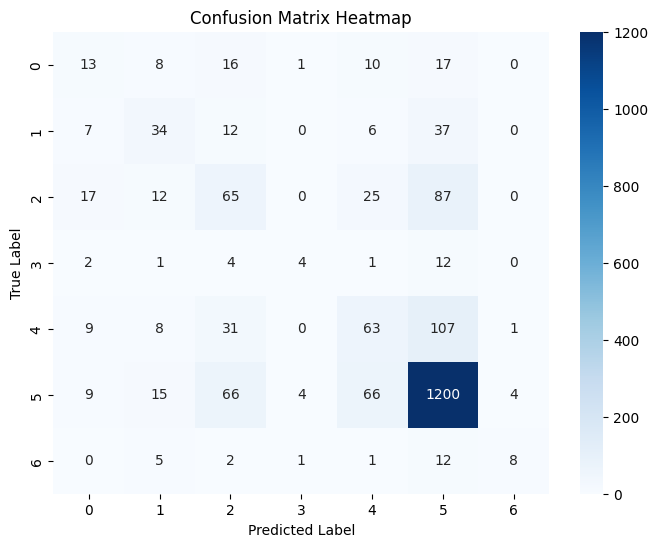

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Model 2: EfficientNet


In [ ]:
import tensorflow as tf
efficientnet_b1 = tf.keras.applications.EfficientNetB1(
    weights='imagenet', include_top=False, input_shape=(100, 100, 3)
)
for layer in efficientnet_b1.layers:
    layer.trainable = False
x = efficientnet_b1.output
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(1024, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(7, activation='softmax')(x)
model2 = tf.keras.Model(inputs=efficientnet_b1.input, outputs=predictions)
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
model2.fit(x_train, y_train_new, batch_size=100, epochs=35)

Epoch 1/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 59s 284ms/step - accuracy: 0.5935 - loss: 4.9463
Epoch 2/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7163 - loss: 0.8062
Epoch 3/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7188 - loss: 0.7596
Epoch 4/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 45ms/step - accuracy: 0.7360 - loss: 0.7244
Epoch 5/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 55ms/step - accuracy: 0.7474 - loss: 0.7020
Epoch 6/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.7482 - loss: 0.6941
Epoch 7/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step - accuracy: 0.7549 - loss: 0.6665
Epoch 8/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 43ms/step - accuracy: 0.7617 - loss: 0.6480
Epoch 9/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 4s 44ms/step - accuracy: 0.7615 - loss: 0.6437
Epoch 10/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 44ms/step - accuracy: 0.7831 - loss: 0.6020
Epoch 11/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7732 - loss: 0.5998
Epoch 12/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 5s 48ms/step - accurac

In [ ]:
model2.evaluate(x_train, y_train_new)

251/251 ━━━━━━━━━━━━━━━━━━━━ 20s 41ms/step - accuracy: 0.9162 - loss: 0.2275


[0.21964776515960693, 0.9196205735206604]

In [ ]:
model2.evaluate(x_test, y_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 98ms/step - accuracy: 0.8061 - loss: 0.6014


[0.674316942691803, 0.7878182530403137]

##Training Accuracy & Loss

In [ ]:
loss, accuracy = model2.evaluate(x_train, y_train_new)
print(f"Training Accuracy: {accuracy * 100:.2f}%")


251/251 ━━━━━━━━━━━━━━━━━━━━ 5s 18ms/step - accuracy: 0.9162 - loss: 0.2275
Training Accuracy: 91.96%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.2196


##Testing Accuracy and Loss

In [ ]:
model2.evaluate(x_test, y_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8061 - loss: 0.6014


[0.674316942691803, 0.7878182530403137]

In [ ]:
test_loss, test_accuracy = model2.evaluate(x_test, y_test_new)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.8061 - loss: 0.6014
Test Accuracy: 78.78%


In [ ]:
print(f"Test Loss: {loss:.4f}")

Test Loss: 0.2196


##Graphical Model Analysis

###Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 17s 146ms/step
Confusion Matrix:
[[  0  46  13   1   4   0   1]
 [  0  53  21   5   7   1   9]
 [  1 125  46   8   3   4  19]
 [  0  15   3   0   2   0   4]
 [  2 129  43   3   6   0  36]
 [ 17 681 503  23  17   5 118]
 [  0  18   9   0   1   1   0]]


###HeatMap

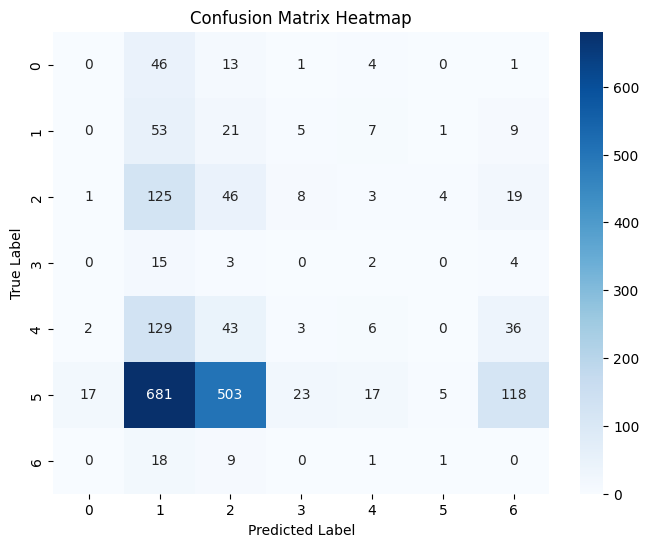

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Model 3: Resnet

In [ ]:
img_height, img_width = 100, 100
batch_size = 32

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow(
    x_train, y_train_new,
    batch_size=batch_size
)

In [ ]:
validation_generator = test_datagen.flow(
    x_test, y_test_new,
    batch_size=batch_size
)

In [ ]:
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(y_train_new.shape[1], activation='softmax')(x)

In [ ]:
model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
for layer in base_model.layers[:143]:
    layer.trainable = False
for layer in base_model.layers[143:]:
    layer.trainable = True

In [ ]:
model.fit(x_train, y_train_new, batch_size=100, epochs=35)

Epoch 1/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 37s 179ms/step - accuracy: 0.6661 - loss: 1.2127
Epoch 2/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 25s 99ms/step - accuracy: 0.7982 - loss: 0.5631
Epoch 3/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8336 - loss: 0.4587
Epoch 4/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 101ms/step - accuracy: 0.8681 - loss: 0.3451
Epoch 5/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 10s 100ms/step - accuracy: 0.9075 - loss: 0.2421
Epoch 6/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 99ms/step - accuracy: 0.9355 - loss: 0.1727 
Epoch 7/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 109ms/step - accuracy: 0.9492 - loss: 0.1459
Epoch 8/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 111ms/step - accuracy: 0.9699 - loss: 0.0864
Epoch 9/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 102ms/step - accuracy: 0.9756 - loss: 0.0722
Epoch 10/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 11s 108ms/step - accuracy: 0.9860 - loss: 0.0382
Epoch 11/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 8s 104ms/step - accuracy: 0.9735 - loss: 0.0759
Epoch 12/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 9s 112ms

In [ ]:
model.evaluate(x_train, y_train_new)

251/251 ━━━━━━━━━━━━━━━━━━━━ 15s 35ms/step - accuracy: 0.9995 - loss: 0.0035


[0.004809352569282055, 0.9987518787384033]

In [ ]:
model.evaluate(x_test, y_test_new)

63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 58ms/step - accuracy: 0.8431 - loss: 1.0160


[1.1818538904190063, 0.8192710876464844]

In [ ]:
y_pred = model.predict(validation_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step


In [ ]:
print(classification_report(y_true, y_pred_classes))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        65
           1       0.00      0.00      0.00        96
           2       0.00      0.00      0.00       206
           3       0.00      0.00      0.00        24
           4       0.00      0.00      0.00       219
           5       0.68      1.00      0.81      1364
           6       0.00      0.00      0.00        29

    accuracy                           0.68      2003
   macro avg       0.10      0.14      0.12      2003
weighted avg       0.46      0.68      0.55      2003



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


###Training Accuracy & Loss

In [ ]:
loss, accuracy = model.evaluate(x_train, y_train_new)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9995 - loss: 0.0035
Training Accuracy: 99.88%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.0048


###Testing Accuracy and Loss

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test_new)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 36ms/step - accuracy: 0.8431 - loss: 1.0160
Test Accuracy: 81.93%


In [ ]:
print(f"Test Loss: {loss:.4f}")

Test Loss: 1.1819


##Graphical Model Analysis

###Confusion matrix



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.utils import to_categorical
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 87ms/step
Confusion Matrix:
[[  44    2    6    2    8    3    0]
 [  10   58    5    4    6   13    0]
 [  10   11  110    0   17   58    0]
 [   1    3    1   13    1    5    0]
 [  10    2   23    0  109   74    1]
 [   9   13   23    4   26 1288    1]
 [   0    2    1    0    0    7   19]]


###HeatMap


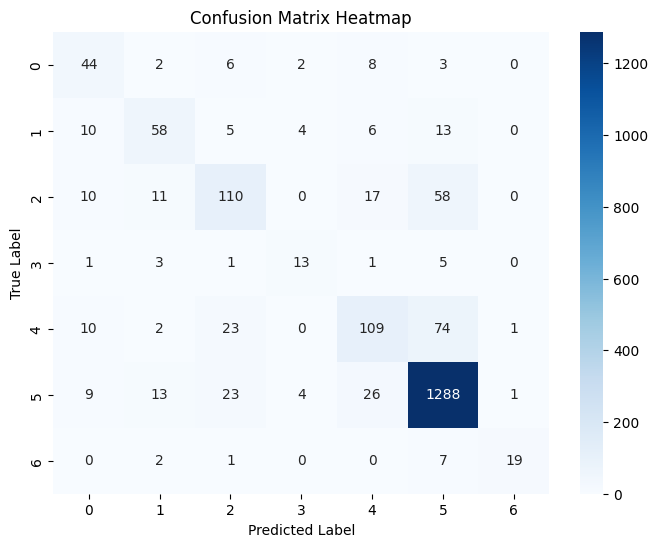

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

#Model 4: Hybrid

In [ ]:
import tensorflow as tf
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Concatenate, Input
from tensorflow.keras.applications import ResNet50, EfficientNetB0
from tensorflow.keras.optimizers import Adam
input_shape = (100, 100, 3)
input_tensor = Input(shape=input_shape)
resnet_model = ResNet50(include_top=False, weights='imagenet', input_tensor=input_tensor)
resnet_output = GlobalAveragePooling2D()(resnet_model.output)
efficientnet_model = EfficientNetB0(include_top=False, weights='imagenet', input_tensor=input_tensor)
efficientnet_output = GlobalAveragePooling2D()(efficientnet_model.output)
combined_output = Concatenate()([resnet_output, efficientnet_output])
x = Dense(128, activation='relu')(combined_output)
output = Dense(7, activation='softmax')(x)
hybrid_model = Model(inputs=input_tensor, outputs=output)
hybrid_model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
hybrid_model.summary()


94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling (Rescaling)     │ (None, 100, 100, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization             │ (None, 100, 100, 3)    │              7 │ rescaling[0][0]        │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_1 (Rescaling)   │ (None, 100, 100, 3)    │              0 │ normalization[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 101, 101, 3)    │              0 │ rescaling_1[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 50, 50, 32)     │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 50, 50, 32)     │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 50, 50, 32)     │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 50, 50, 32)     │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 50, 50, 32)     │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 50, 50, 32)     │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_expand    

 Total params: 28,064,298 (107.06 MB)

 Trainable params: 27,969,155 (106.69 MB)

 Non-trainable params: 95,143 (371.66 KB)

In [ ]:
hybrid_model.fit(x_train, y_train_new, batch_size=100, epochs=35s)

Epoch 1/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 279s 1s/step - accuracy: 0.6779 - loss: 0.9776
Epoch 2/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 35s 361ms/step - accuracy: 0.8332 - loss: 0.4532
Epoch 3/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 364ms/step - accuracy: 0.8852 - loss: 0.3162
Epoch 4/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 39s 344ms/step - accuracy: 0.9101 - loss: 0.2714
Epoch 5/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 28s 346ms/step - accuracy: 0.9367 - loss: 0.1918
Epoch 6/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 344ms/step - accuracy: 0.9477 - loss: 0.1484
Epoch 7/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 42s 349ms/step - accuracy: 0.9683 - loss: 0.1018
Epoch 8/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 40s 345ms/step - accuracy: 0.9604 - loss: 0.1123
Epoch 9/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 346ms/step - accuracy: 0.9710 - loss: 0.0894
Epoch 10/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 343ms/step - accuracy: 0.9794 - loss: 0.0655
Epoch 11/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 340ms/step - accuracy: 0.9759 - loss: 0.0729
Epoch 12/35
81/81 ━━━━━━━━━━━━━━━━━━━━ 41s 

###Training Accuracy & Loss

In [ ]:
loss, accuracy = hybrid_model.evaluate(x_train, y_train_new)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

251/251 ━━━━━━━━━━━━━━━━━━━━ 30s 63ms/step - accuracy: 0.9975 - loss: 0.0064
Training Accuracy: 99.78%


In [ ]:
print(f"Training Loss: {loss:.4f}")

Training Loss: 0.0067


###Testing Accuracy and Loss

In [ ]:
# Evaluate the model on the training data
loss, accuracy = hybrid_model.evaluate(x_test, y_test_new)

# Print the accuracy
print(f"Test Accuracy: {accuracy * 100:.2f}%")

63/63 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8554 - loss: 0.8148
Test Accuracy: 83.23%


In [ ]:
print(f"Test Loss: {loss:.4f}")

Test Loss: 0.9785


## Graphical Analysis

###Confusion Matrix

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
y_pred = hybrid_model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test_new, axis=1)
cm = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(cm)

63/63 ━━━━━━━━━━━━━━━━━━━━ 25s 252ms/step
Confusion Matrix:
[[  29   13   12    1    9    1    0]
 [   5   66    5    3    4   12    1]
 [   6    9  130    1   26   34    0]
 [   0    6    0   10    1    7    0]
 [   2    5   21    1  123   67    0]
 [   1   12   34    0   25 1289    3]
 [   0    0    2    1    1    5   20]]


###Heatmap

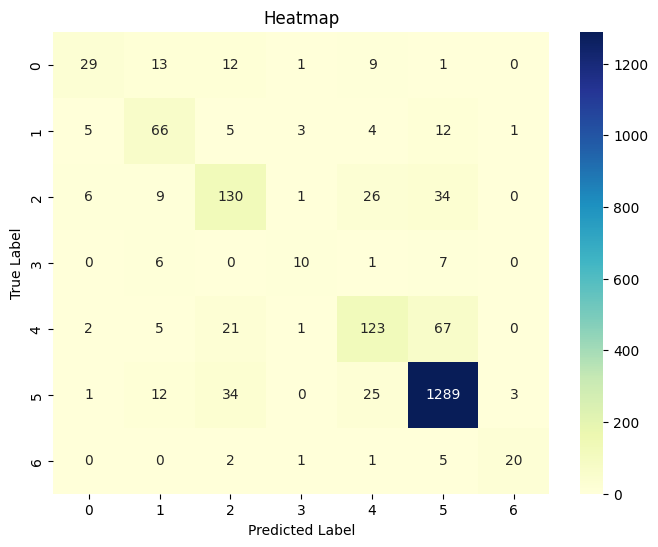

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=range(7), yticklabels=range(7))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Heatmap')
plt.show()

#Comparison

##Table

In [ ]:
import pandas as pd
models = ['Model 1:', 'Model 2:', 'Model 3:', 'Model 4:']
training_accuracy = [97.15, 91.96, 99.88, 99.78]
testing_accuracy = [69.25, 78.78, 81.93, 83.23]
training_loss = [0.0793, 0.2196, 0.0048,  0.0067]
testing_loss = [ 0.0793, 0.2196, 1.1819, 0.9785]
data = {
    'Models': models,
    'Training Accuracy': training_accuracy,
    'Testing Accuracy': testing_accuracy,
    'Training Loss': training_loss,
    'Testing Loss': testing_loss,
}
df = pd.DataFrame(data)
print(df)
df.to_csv('model_comparison.csv', index=False)

     Models  Training Accuracy  Testing Accuracy  Training Loss  Testing Loss
0  Model 1:              97.15             69.25         0.0793        0.0793
1  Model 2:              91.96             78.78         0.2196        0.2196
2  Model 3:              99.88             81.93         0.0048        1.1819
3  Model 4:              99.78             83.23         0.0067        0.9785


##Bar-graphs

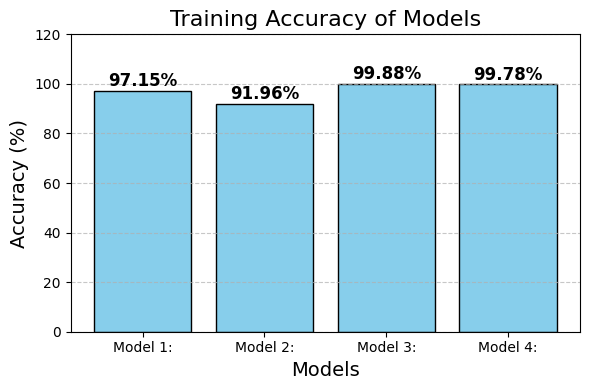

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = plt.bar(df['Models'], df['Training Accuracy'], color='skyblue', edgecolor='black')
plt.title('Training Accuracy of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 120)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, df['Training Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.3, f"{value}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

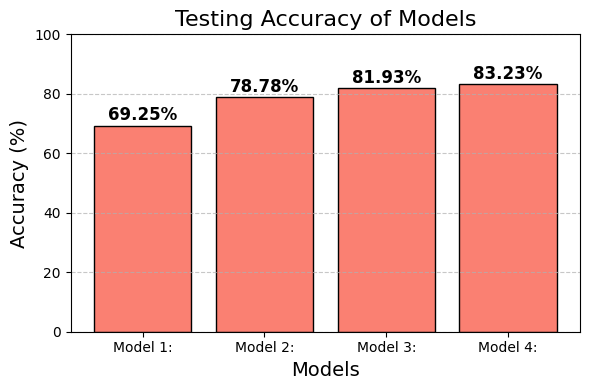

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = plt.bar(df['Models'], df['Testing Accuracy'], color='salmon', edgecolor='black')
plt.title('Testing Accuracy of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, df['Testing Accuracy']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.5, f"{value}%",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

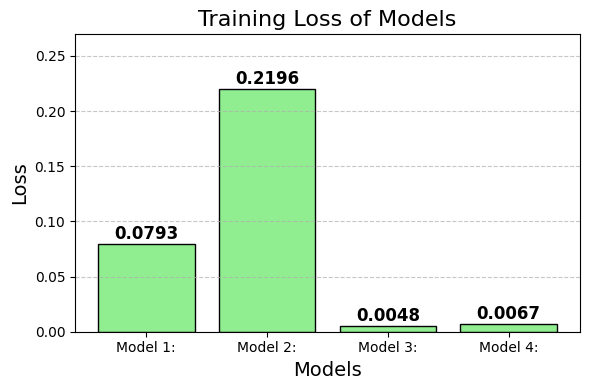

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = plt.bar(df['Models'], df['Training Loss'], color='lightgreen', edgecolor='black')
plt.title('Training Loss of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Loss', fontsize=14)
max_loss = max(df['Training Loss'])
plt.ylim(0, max_loss + 0.05)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, df['Training Loss']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.001, f"{value}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

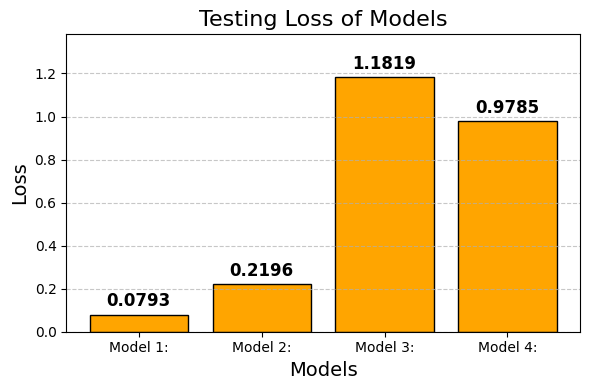

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
bars = plt.bar(df['Models'], df['Testing Loss'], color='orange', edgecolor='black')
plt.title('Testing Loss of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Loss', fontsize=14)
max_loss = max(df['Testing Loss'])
plt.ylim(0, max_loss + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.7)
for bar, value in zip(bars, df['Testing Loss']):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.02, f"{value}",
             ha='center', va='bottom', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

##Line Plots

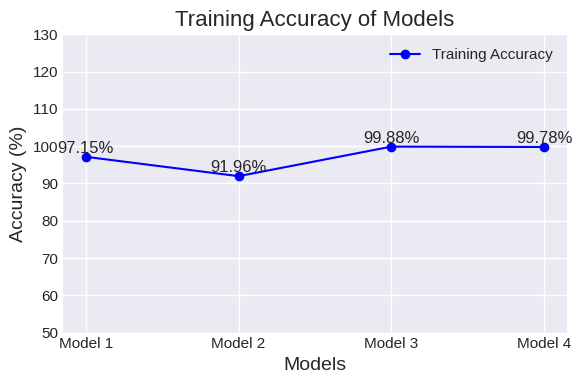

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Models'], df['Training Accuracy'], marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.title('Training Accuracy of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(50, 130)
plt.grid(True)
plt.legend()
for i, value in enumerate(df['Training Accuracy']):
    plt.text(i, value + 0.3, f"{value}%", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

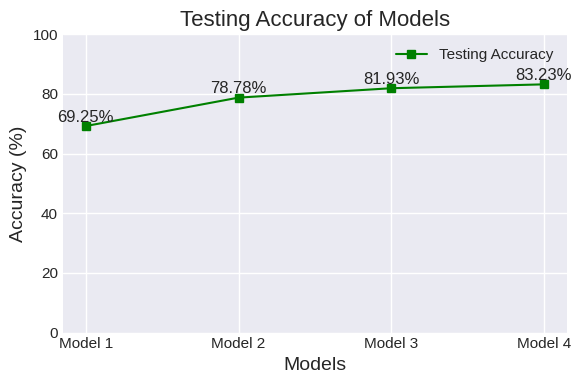

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 4))
plt.plot(df['Models'], df['Testing Accuracy'], marker='s', linestyle='-', color='green', label='Testing Accuracy')
plt.title('Testing Accuracy of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Accuracy (%)', fontsize=14)
plt.ylim(0, 100)
plt.grid(True)
plt.legend()
for i, value in enumerate(df['Testing Accuracy']):
    plt.text(i, value + 0.5, f"{value}%", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

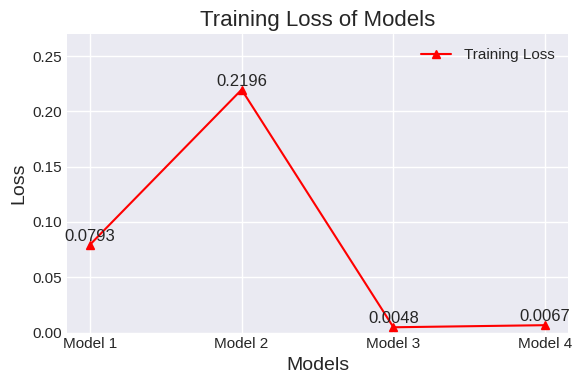

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Models'], df['Training Loss'], marker='^', linestyle='-', color='red', label='Training Loss')
plt.title('Training Loss of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.ylim(0, max(df['Training Loss']) + 0.05)
plt.grid(True)
plt.legend()
for i, value in enumerate(df['Training Loss']):
    plt.text(i, value + 0.001, f"{value}", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()

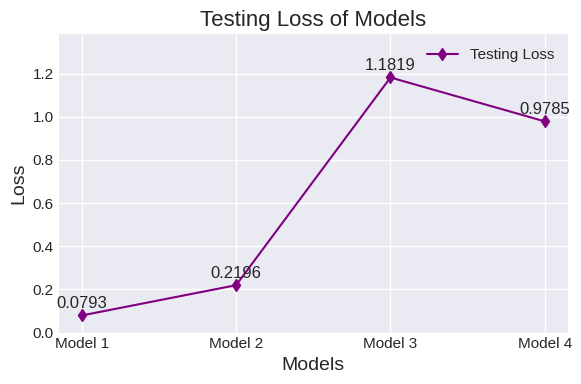

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
plt.plot(df['Models'], df['Testing Loss'], marker='d', linestyle='-', color='purple', label='Testing Loss')
plt.title('Testing Loss of Models', fontsize=16)
plt.xlabel('Models', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.ylim(0, max(df['Testing Loss']) + 0.2)
plt.grid(True)
plt.legend()
for i, value in enumerate(df['Testing Loss']):
    plt.text(i, value + 0.02, f"{value}", ha='center', va='bottom', fontsize=12)
plt.tight_layout()
plt.show()